
# 📝 Assignment 5 — COVID-19 Data Analysis Project

**Author:** Harsh Tripathi  

This notebook analyzes COVID-19 confirmed cases and deaths alongside the World Happiness dataset.  
We will explore, clean, and merge these datasets to study correlations between pandemic impact and happiness indicators (GDP, health, social support, etc.).

---


## 1. Import Libraries

In [7]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display version info
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", plt.matplotlib.__version__)
print("seaborn:", sns.__version__)


pandas: 2.2.2
numpy: 1.26.4
matplotlib: 3.9.2
seaborn: 0.13.2


## 2. Load the Datasets

In [8]:

# Load datasets (ensure CSV files are in the same folder as this notebook)
confirmed_df = pd.read_csv("covid19_Confirmed_dataset.csv")
deaths_df    = pd.read_csv("covid19_deaths_dataset.csv")
happiness_df = pd.read_csv("worldwide_happiness_report.csv")

# Display shapes and first few rows
print("Confirmed:", confirmed_df.shape)
print("Deaths:", deaths_df.shape)
print("Happiness:", happiness_df.shape)

confirmed_df.head(3)


Confirmed: (266, 104)
Deaths: (266, 104)
Happiness: (156, 9)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006


## 3. Data Cleaning & Preprocessing

In [9]:

# Aggregate COVID-19 data at country level
conf_country = confirmed_df.groupby("Country/Region").sum().drop(columns=["Lat","Long"])
death_country = deaths_df.groupby("Country/Region").sum().drop(columns=["Lat","Long"])

# Standardize country names to match Happiness dataset
rename_map = {
    "US": "United States",
    "Korea, South": "South Korea",
    "Czechia": "Czech Republic",
    "Burma": "Myanmar",
    "Eswatini": "Swaziland",
    "West Bank and Gaza": "Palestinian Territories"
}

conf_country = conf_country.rename(index=rename_map).groupby(level=0).sum()
death_country = death_country.rename(index=rename_map).groupby(level=0).sum()

# Prepare Happiness dataset
happiness_df = happiness_df.rename(columns={"Country or region": "Country"}).set_index("Country")

# Intersect countries available in both datasets
common_countries = conf_country.index.intersection(happiness_df.index)
conf_country = conf_country.loc[common_countries]
death_country = death_country.loc[common_countries]
happiness_df = happiness_df.loc[common_countries]

print("Common countries:", len(common_countries))


Common countries: 149


## 4. Exploratory Data Analysis (EDA) — COVID-19

Top 10 Confirmed Cases ( 4/30/20 ):
United States     1069424
Spain              213435
Italy              205463
United Kingdom     172481
France             167299
Germany            163009
Turkey             120204
Russia             106498
Iran                94640
Brazil              87187
Name: 4/30/20, dtype: int64

Top 10 Deaths ( 4/30/20 ):
United States     62996
Italy             27967
United Kingdom    26842
Spain             24543
France            24410
Belgium            7594
Germany            6623
Iran               6028
Brazil             6006
Netherlands        4811
Name: 4/30/20, dtype: int64


C:\Users\tripa\AppData\Local\Temp\ipykernel_14976\1939963238.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cases.values, y=top_cases.index, palette="Reds_r")


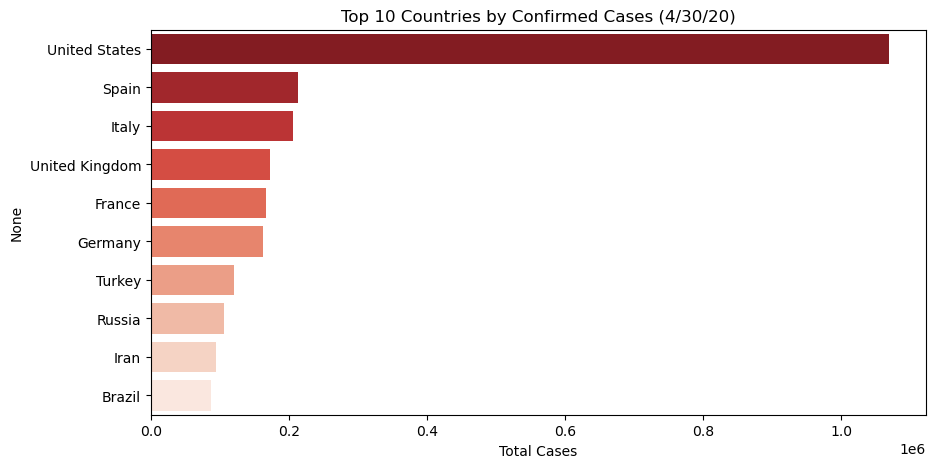

C:\Users\tripa\AppData\Local\Temp\ipykernel_14976\1939963238.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_deaths.values, y=top_deaths.index, palette="Greys_r")


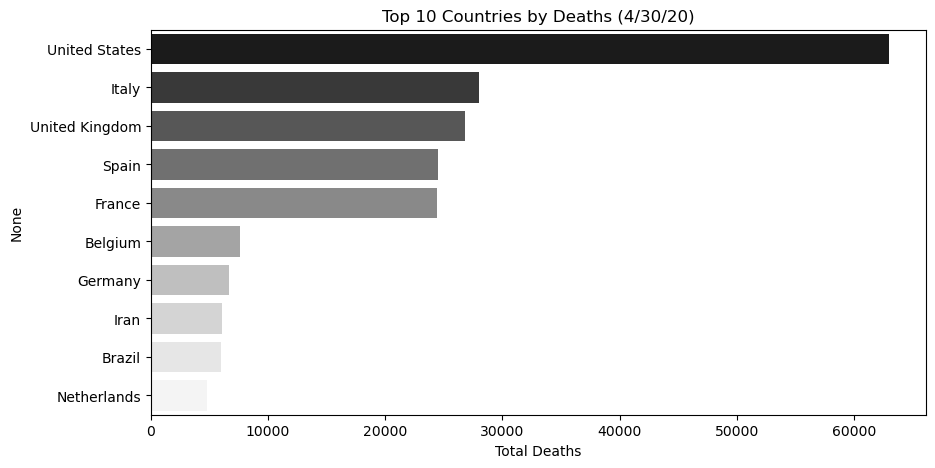

In [10]:

# Top 10 countries by confirmed cases and deaths (as of last date)
last_date = conf_country.columns[-1]
top_cases = conf_country[last_date].sort_values(ascending=False).head(10)
top_deaths = death_country[last_date].sort_values(ascending=False).head(10)

print("Top 10 Confirmed Cases (", last_date, "):")
print(top_cases)
print("\nTop 10 Deaths (", last_date, "):")
print(top_deaths)

# Bar plot of top 10 cases
plt.figure(figsize=(10,5))
sns.barplot(x=top_cases.values, y=top_cases.index, palette="Reds_r")
plt.title(f"Top 10 Countries by Confirmed Cases ({last_date})")
plt.xlabel("Total Cases")
plt.show()

# Bar plot of top 10 deaths
plt.figure(figsize=(10,5))
sns.barplot(x=top_deaths.values, y=top_deaths.index, palette="Greys_r")
plt.title(f"Top 10 Countries by Deaths ({last_date})")
plt.xlabel("Total Deaths")
plt.show()


## 5. Exploratory Data Analysis (EDA) — Happiness

Top 10 Happiest Countries:
             Score
Finland      7.769
Denmark      7.600
Norway       7.554
Iceland      7.494
Netherlands  7.488
Switzerland  7.480
Sweden       7.343
New Zealand  7.307
Canada       7.278
Austria      7.246


C:\Users\tripa\AppData\Local\Temp\ipykernel_14976\2703788124.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_happy["Score"], y=top_happy.index, palette="Blues_r")


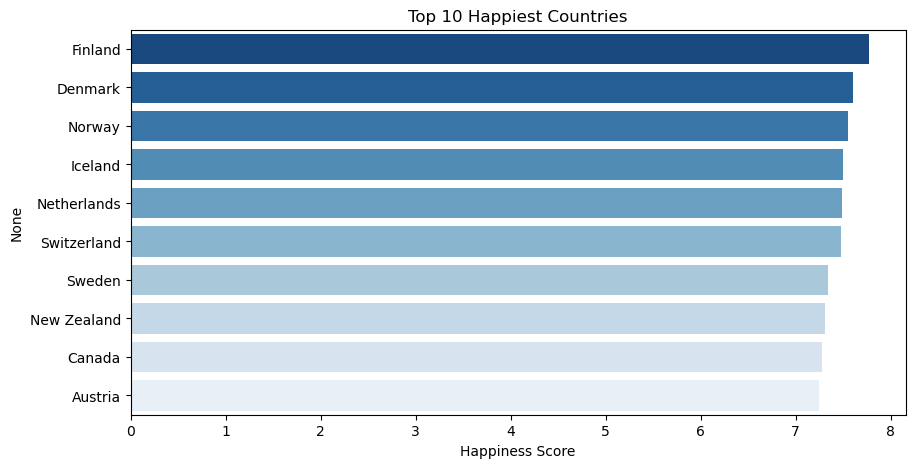

In [11]:

# Top 10 happiest countries
top_happy = happiness_df.sort_values("Score", ascending=False).head(10)
print("Top 10 Happiest Countries:")
print(top_happy[["Score"]])

# Bar plot happiness
plt.figure(figsize=(10,5))
sns.barplot(x=top_happy["Score"], y=top_happy.index, palette="Blues_r")
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.show()


## 6. Merge Datasets & Correlation Analysis

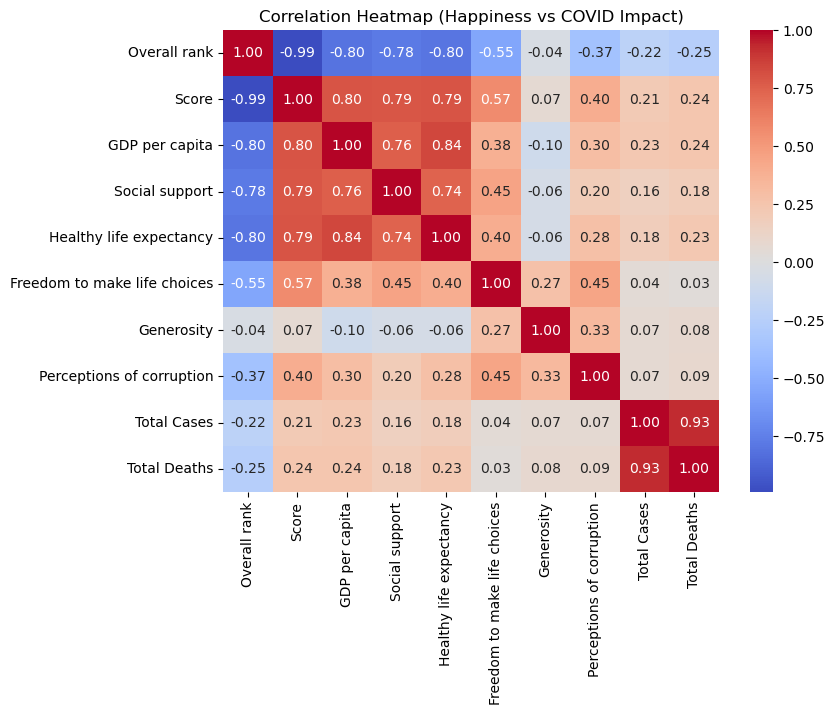

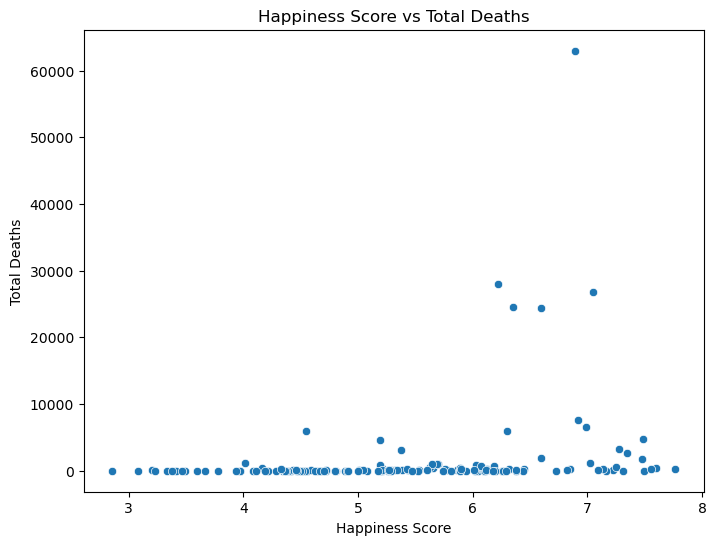

Correlation (Happiness Score vs Total Cases): 0.21268108806865885
Correlation (Happiness Score vs Total Deaths): 0.2412280667486845


In [12]:

# Merge happiness with COVID totals
merged = happiness_df.copy()
merged["Total Cases"] = conf_country[last_date]
merged["Total Deaths"] = death_country[last_date]

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Happiness vs COVID Impact)")
plt.show()

# Scatter plot Happiness vs Deaths
plt.figure(figsize=(8,6))
sns.scatterplot(x=merged["Score"], y=merged["Total Deaths"])
plt.title("Happiness Score vs Total Deaths")
plt.xlabel("Happiness Score")
plt.ylabel("Total Deaths")
plt.show()

# Print correlation values
print("Correlation (Happiness Score vs Total Cases):", merged["Score"].corr(merged["Total Cases"]))
print("Correlation (Happiness Score vs Total Deaths):", merged["Score"].corr(merged["Total Deaths"]))



## 7. Insights & Conclusion

- The **United States** and Western Europe had the highest COVID-19 cases and deaths by April 2020.  
- The **Happiest countries** (Nordic nations) were not among the hardest hit early in the pandemic.  
- **Correlation analysis** shows no strong negative relationship between happiness and COVID impact; in fact, richer/happier countries often reported more cases and deaths.  
- Conclusion: The hypothesis *"Happier countries had better COVID outcomes"* is **not supported** by this dataset slice.  

---
